In [1]:
import pandas as pd

df=pd.read_csv('data.csv')
df

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [2]:
import re

df['title'] = df['title'].str.lower()

df['title'] = df['title'].apply(lambda x: re.sub('http\S*', '', x))

df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x))

df['title'] = df['title'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['title'] = df['title'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

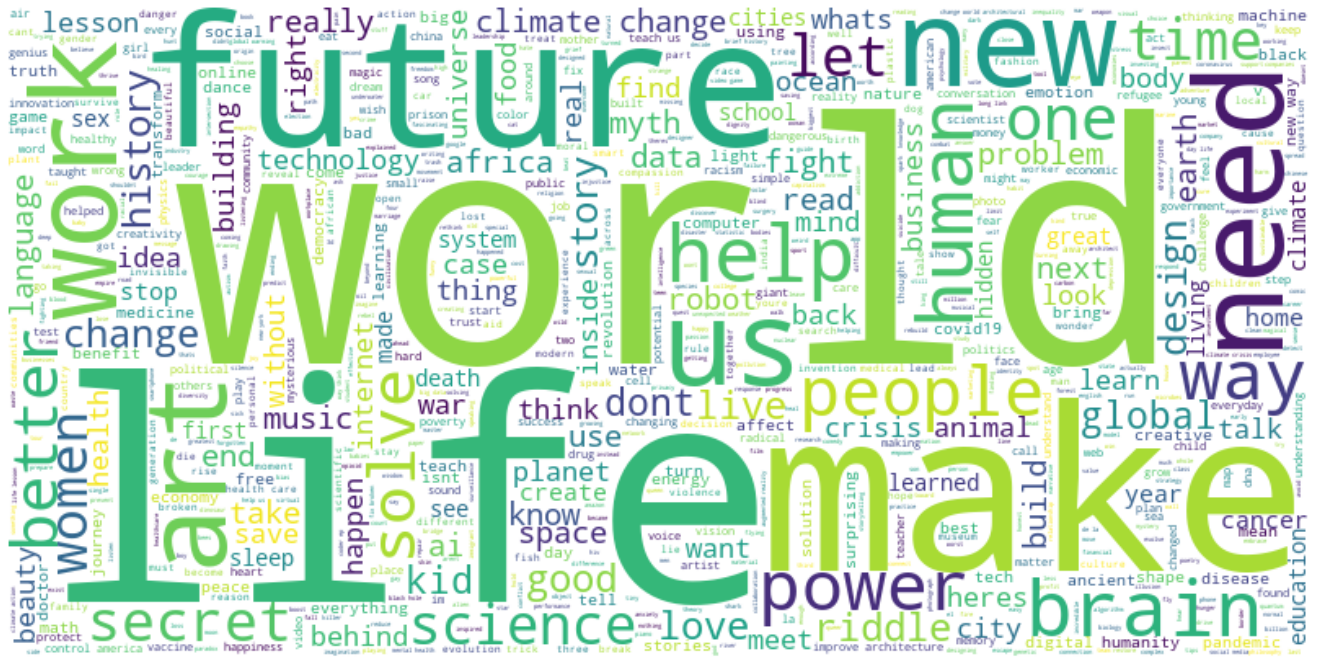

In [4]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

import matplotlib.pyplot as plt
%matplotlib inline

wc.generate(' '.join(df['title']))

plt.figure(figsize=(24, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
df1 = df[df['title'].str.contains('brain')]
df1['likes'].mean()

98177.47777777778

In [6]:
df['likes'].mean()

62607.616727941175

In [7]:
df2=df[df['title'].str.contains('world')]
df2['likes'].mean()

48933.214634146345